In [ ]:
Задача: Проанализировать группы товаров и ответить на вопросы

In [1]:
"""Сколько групп с разной сезонностью можно выделить в товарах?
Так же загружаем данные из БД(sqlite) с помощью sqlalchemy и pandas
"""
import sqlalchemy as sa
import pandas as pd
import plotly.express as px
engine = sa.create_engine('sqlite:///hw.db')
meta = sa.MetaData()
meta.reflect(bind=engine)

prd_df = meta.tables['t']
sql = sa.select([prd_df])

with engine.connect() as cn:
    df = pd.read_sql(sql, cn)
cn.close()

#посмотрим как выглядит наш датафрейм
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df=df[['city','item','total','month']]
df

city  item   total  month
0           0     1   55100      1
1           0     2   37544      1
2           1     2    1444      1
3           0     3   39678      1
4           0     4   28155      1
...       ...   ...     ...    ...
1715748     1  1241   16110     12
1715749     2  1241   10740     12
1715750     0  1242  159430     12
1715751     1  1242   19260     12
1715752     2  1242    4280     12

[1715753 rows x 4 columns]

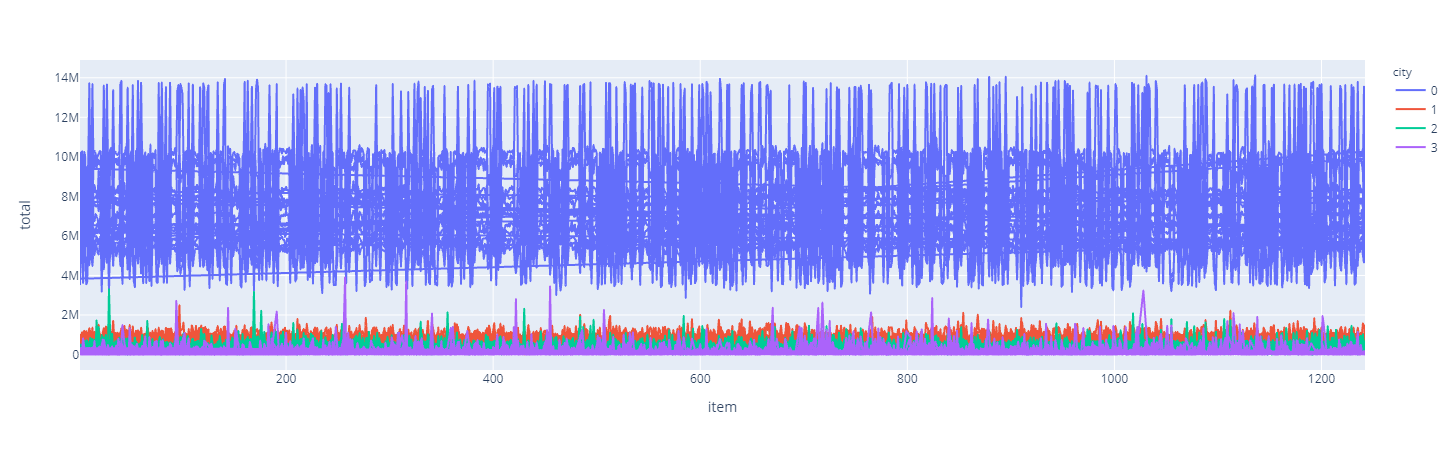

In [15]:
#посмотрим как распределены продажи по разным городам
df_1=(df.groupby(['month', 'item', 'city'], as_index=False)
        .sum())
fig = px.line(df_1, x='item', y='total', color='city')
fig.show()

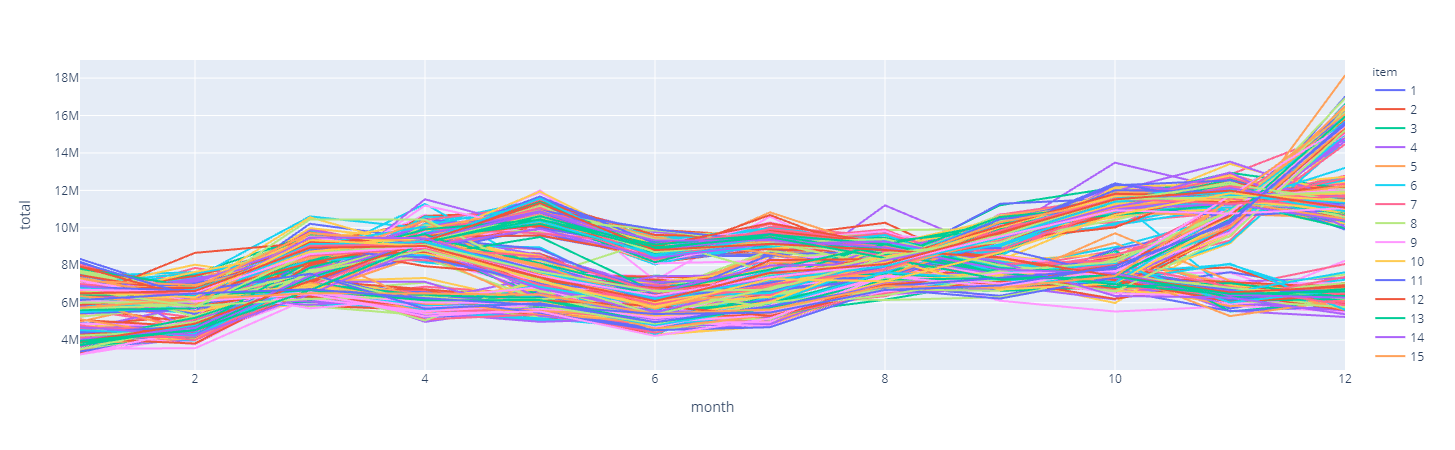

In [3]:
"""для распределения товаров по группам сезонности используем plotly(она удобна в части интерактивности и
по подписям и подсказкам можно увидеть значение, категорию, приблизить участок графика и т.д.)"""
import plotly.express as px
df_1=(df.groupby(['month', 'item'], as_index=False)
        .sum())
fig = px.line(df_1, x='month', y='total', color='item')
fig.show()

In [4]:
df

city  item   total  month
0           0     1   55100      1
1           0     2   37544      1
2           1     2    1444      1
3           0     3   39678      1
4           0     4   28155      1
...       ...   ...     ...    ...
1715748     1  1241   16110     12
1715749     2  1241   10740     12
1715750     0  1242  159430     12
1715751     1  1242   19260     12
1715752     2  1242    4280     12

[1715753 rows x 4 columns]

In [2]:
#присвоим товарам группы исходя из предыдущего графика
df_1=(df.groupby(['month', 'item','city'], as_index=False)
        .sum())
df['abc']='C'
df_b=df_1[(df_1['month']==12) & ((df_1['total'])>9000000)&((df_1['total'])<14000000)]
df_a=df_1[(df_1['month']==12) & ((df_1['total'])>14000000)]
df.loc[df['item'].isin(df_b['item']), 'abc'] = 'B'
df.loc[df['item'].isin(df_a['item']), 'abc'] = 'A'
df=df[['city','abc','total']]
df

city abc   total
0           0   C   55100
1           0   B   37544
2           1   B    1444
3           0   B   39678
4           0   C   28155
...       ...  ..     ...
1715748     1   B   16110
1715749     2   B   10740
1715750     0   B  159430
1715751     1   B   19260
1715752     2   B    4280

[1715753 rows x 3 columns]

In [3]:
#так же по заданию нужно было рассчитать относительные продажи каждого города внутри каждой из групп
df_1 = df.groupby(['abc', 'city']).sum()/df.groupby(['abc']).sum()
df_1.drop(columns=['city'], inplace=True)
df_1

total
abc city          
A   0     0.865738
    1     0.085793
    2     0.043389
    3     0.005079
B   0     0.867368
    1     0.082890
    2     0.041391
    3     0.008352
C   0     0.868664
    1     0.082161
    2     0.040476
    3     0.008699

<AxesSubplot:xlabel='city'>

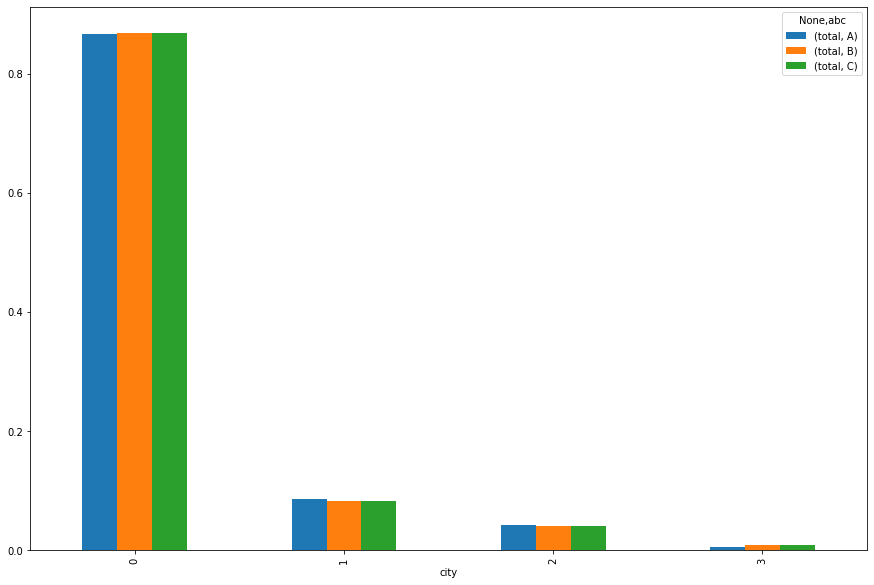

In [14]:
df_1.unstack(level=0).plot(kind='bar', subplots=False,figsize=(15,10))
#были сложности с построением barplot, он постоянно ругался на многоуровневые колонки и, собственно, оси, в то время когда ...plot(kind='bar'... схватывает всё сам и работает отлично

In [23]:
# чтобы seaborn принял на вход dataframe пришлось лишить его многоуровневых индексов
df_1 = df_1.unstack(level=0).stack().reset_index()
df_1

city abc     total
0      0   A  0.865738
1      0   B  0.867368
2      0   C  0.868664
3      1   A  0.085793
4      1   B  0.082890
5      1   C  0.082161
6      2   A  0.043389
7      2   B  0.041391
8      2   C  0.040476
9      3   A  0.005079
10     3   B  0.008352
11     3   C  0.008699

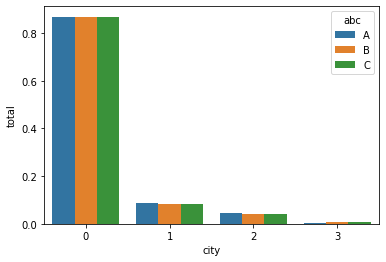

In [28]:
#собственно, строим графики относительных продаж по группам и городам
import seaborn as sns
g = sns.barplot(x='city', y="total", hue="abc", data=df_1)